In [29]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

### Set model size

In [2]:
xmin = 0
nx = 300
dx = 10
xmax = xmin+(nx-1)*dx
x = np.linspace(xmin, xmax, nx)

zmin = 0
nz = 200
dz = 10
zmax = zmin+(nz-1)*dz
z = np.linspace(zmin, zmax, nz)

print("xmin:", xmin)
print("xmax:", xmax)
print("dx:", dx)
print("nx:", nx)
print("x.size:", x.size)

print("zmin:", zmin)
print("zmax:", zmax)
print("dz:", dz)
print("nz:", nz)
print("z.size:", z.size)

xmin: 0
xmax: 2990
dx: 10
nx: 300
x.size: 300
zmin: 0
zmax: 1990
dz: 10
nz: 200
z.size: 200


### Set layer 1

In [3]:
z1 = 1000
nz1 = round((z1-zmin)/dz)
print("z1:", z1)
print("nz1:", nz1)

z1: 1000
nz1: 100


### Set layer 2

In [4]:
vp1 = 2000
vp2 = 2500
vs1 = vp1*0.7
vs2 = vp2*0.7
rho1 = 2300
rho2 = 2500

### Generate model

In [5]:
Vp = np.ones((nz,nx))
Vs = np.ones((nz,nx))
RHO = np.ones((nz,nx))

In [6]:
Z = np.matlib.repmat(z, nx, 1).transpose()

Vp[0:nz1, :] = vp1
Vs[0:nz1, :] = vs1
RHO[0:nz1, :] = rho1

Vp[nz1:, :] = vp2
Vs[nz1:, :] = vs2
RHO[nz1:, :] = rho2

In [7]:
# p - pressure
# p0 - atmospheric pressure
# p = p0 + INTEGRAL(rho*g*dz)
g = 10
p0 = 1e5
p = np.zeros(nz)
p[0] = p0
for i in range(1, nz):
    p[i] = p[i-1] + RHO[i-1,0]*g*dz

P = np.ones((nz,nx))
for j in range(0, nx):
    P[:,j] = p

### Visualize model

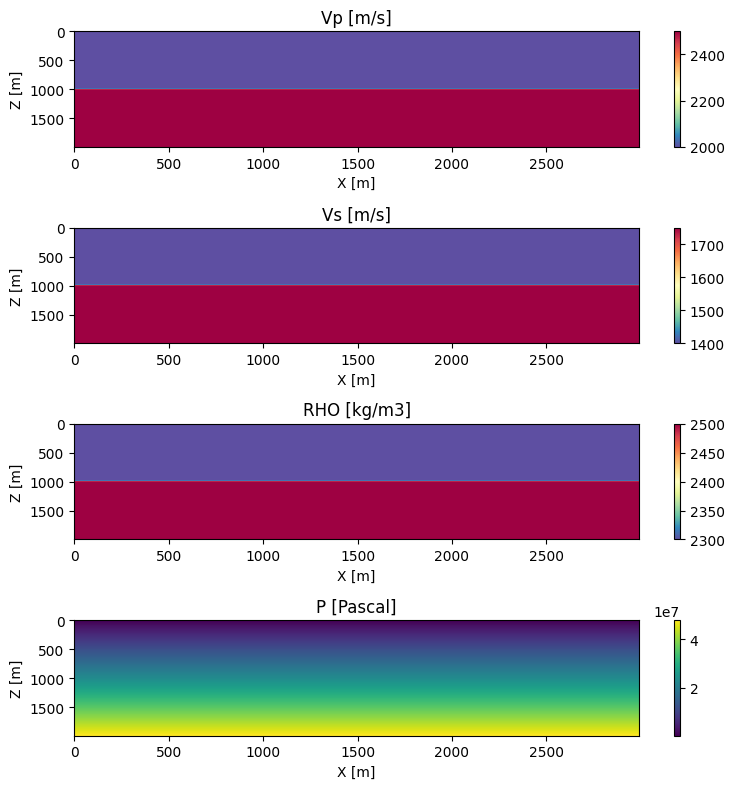

In [20]:
fig, axs = plt.subplots(4, 1, sharey=True, tight_layout=True)

im0 = axs[0].imshow(Vp, cmap='Spectral_r', extent=[xmin, xmax, zmax, zmin])
im1 = axs[1].imshow(Vs, cmap='Spectral_r', extent=[xmin, xmax, zmax, zmin])
im2 = axs[2].imshow(RHO, cmap='Spectral_r', extent=[xmin, xmax, zmax, zmin])
im3 = axs[3].imshow(P, cmap='viridis', extent=[xmin, xmax, zmax, zmin])

axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_aspect('auto', adjustable='box')

axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_aspect('auto', adjustable='box')

axs[2].set_xlabel('X [m]')
axs[2].set_ylabel('Z [m]')
axs[2].set_aspect('auto', adjustable='box')

axs[3].set_xlabel('X [m]')
axs[3].set_ylabel('Z [m]')
axs[3].set_aspect('auto', adjustable='box')

axs[0].set_title(f"Vp [m/s]")
axs[1].set_title(f"Vs [m/s]")
axs[2].set_title(f"RHO [kg/m3]")
axs[3].set_title(f"P [Pascal]")

fig.colorbar(im0, orientation="vertical", location='right')
fig.colorbar(im1, orientation="vertical", location='right')
fig.colorbar(im2, orientation="vertical", location='right')
fig.colorbar(im3, orientation="vertical", location='right')

fig.set_figheight(8)
fig.set_figwidth(8)

### Add OVERPRESSURE zone

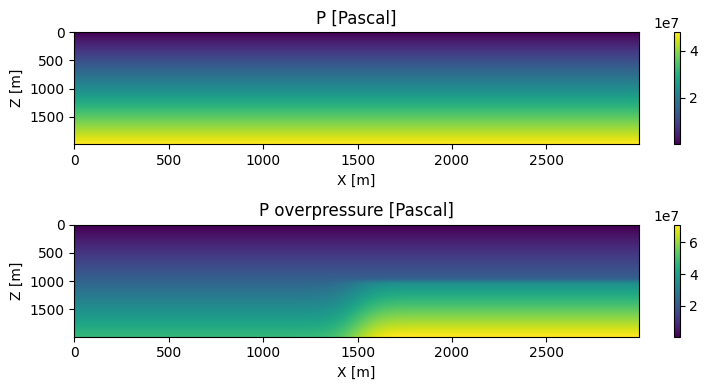

In [35]:
over_p_coef = 1.5
# scale selected area by ovepressure coef
P_OVER = np.copy(P)
P_OVER[nz1:, round(nx/2):] = P[nz1:, round(nx/2):] * over_p_coef
P_OVER = gaussian_filter(P_OVER, sigma=(3,10))



fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)

im0 = axs[0].imshow(P, cmap='viridis', extent=[xmin, xmax, zmax, zmin])
im1 = axs[1].imshow(P_OVER, cmap='viridis', extent=[xmin, xmax, zmax, zmin])

axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_aspect('auto', adjustable='box')

axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_aspect('auto', adjustable='box')

axs[0].set_title(f"P [Pascal]")
axs[1].set_title(f"P overpressure [Pascal]")

fig.colorbar(im0, orientation="vertical", location='right')
fig.colorbar(im1, orientation="vertical", location='right')

fig.set_figheight(4)
fig.set_figwidth(8)

In [36]:
from pathlib import Path

SAVEDIR = "data"
Path(SAVEDIR).mkdir(parents=True, exist_ok=True)

np.save(f"{SAVEDIR}/Vp.npy", Vp)
np.save(f"{SAVEDIR}/Vs.npy", Vs)
np.save(f"{SAVEDIR}/RHO.npy", RHO)
np.save(f"{SAVEDIR}/P_OVER.npy", P)